In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mglearn
from sklearn.decomposition import PCA

import pandas as pd

import os
import os.path as path
import wget

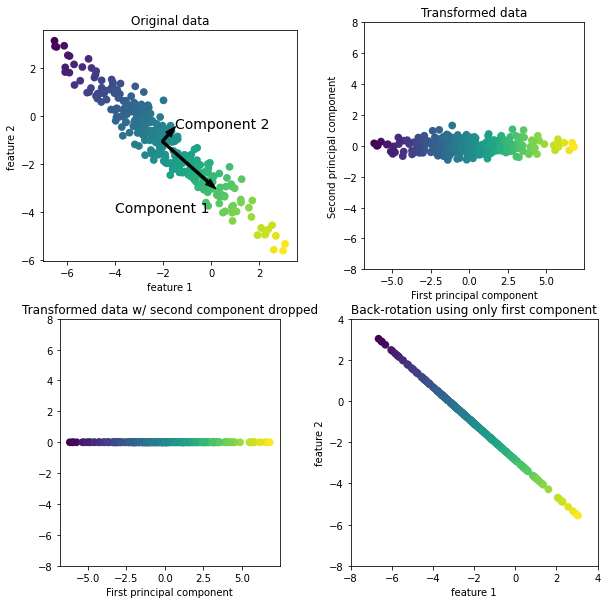

In [2]:
mglearn.plots.plot_pca_illustration()

In [3]:
# Descargamos data
if not path.exists('Data'):
    os.mkdir('Data')

!rm Data/*

file = 'Data/data.csv'
url = 'https://raw.githubusercontent.com/asegura4488/DataBase/main/MetodosComputacionales/PCA.dat'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [................................................................................] 1891 / 1891File loaded


In [4]:
data = np.loadtxt(Path_)

In [6]:
data[:,0] = data[:,0] - np.mean(data[:,0])
data[:,1] = data[:,1] - np.mean(data[:,1])

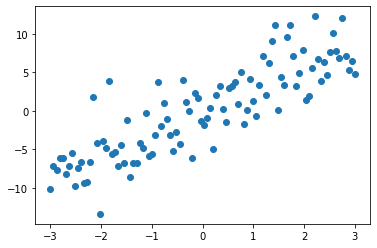

In [7]:
plt.scatter(data[:,0],data[:,1])

In [13]:
CovMatrix = np.cov(data.T)
CovMatrix

array([[ 3.09152137,  8.82101855],
       [ 8.82101855, 34.56025706]])

In [15]:
def E(x):
    #return np.mean(x)
    return np.sum(x)/(len(x)-1)

def GetCov(data):
    
    N = data.shape[1]
    
    Cov = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            
            X = data[:,i]
            Y = data[:,j]
            
            Cov[i,j] = E( (X-E(X))*(Y-E(Y)) )
            
    return Cov

In [16]:
CovMatrix1 = GetCov(data)
CovMatrix1

array([[ 3.09152137,  8.82101855],
       [ 8.82101855, 34.56025706]])

In [17]:
CovMatrix

array([[ 3.09152137,  8.82101855],
       [ 8.82101855, 34.56025706]])

In [19]:
values, vectores = np.linalg.eig(CovMatrix)
print(values)
vectores

[ 0.78757722 36.86420121]


array([[-0.96754198, -0.25271035],
       [ 0.25271035, -0.96754198]])

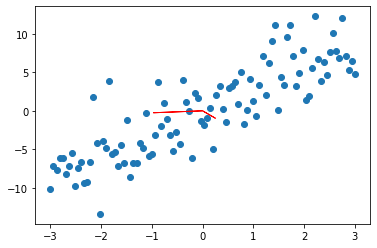

In [20]:
plt.scatter(data[:,0],data[:,1])
plt.arrow(0,0,vectores[0,0],vectores[0,1],color='r')
plt.arrow(0,0,vectores[1,0],vectores[1,1],color='r')

In [23]:
new_data = np.dot( vectores.T, data.T )

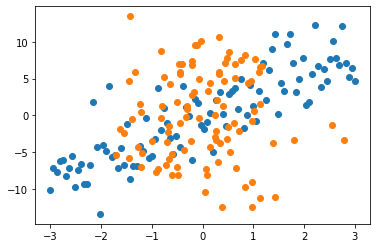

In [26]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(new_data[0,:],new_data[1,:])

In [28]:
print(data[0], vectores.T[1])
print(np.dot(data[0],vectores.T[1]))

[ -3.         -10.20539038] [-0.25271035 -0.96754198]
10.632274643456906


In [29]:
T_data = np.dot(data,vectores.T[1])
T_data

array([ 10.63227464,   7.67148148,   8.2179293 ,   6.70115674,
         6.61698391,   8.6812961 ,   7.55531665,   5.97026562,
        10.10162965,   7.85515119,   7.01268573,   9.64109424,
         9.59099341,   7.06510359,  -1.24810954,   4.6327968 ,
        13.49372662,   4.35277842,   5.14445362,  -3.33494355,
         5.87185544,   5.62061134,   7.38302237,   4.73331524,
         6.89926675,   1.53107699,   8.74009046,   6.97739001,
         6.94191842,   4.35576331,   4.97941034,   0.58039505,
         5.89519257,   5.64402684,   3.30842157,  -3.40132004,
         2.15837106,  -0.76798147,   1.23070234,   3.16205201,
         5.22876081,   2.81723542,   4.24691432,  -3.74609176,
        -1.06475677,   0.11537299,   5.95068295,  -2.16563346,
        -1.57601198,   1.27420456,   1.77625672,   0.83362356,
        -0.3473829 ,   4.71066671,  -2.06366703,  -3.18408989,
        -0.28452774,   1.26939251,  -2.99667695,  -3.3212946 ,
        -3.82435892,  -1.0580747 ,  -5.03628567,   1.48

In [32]:
M = np.zeros((len(T_data),2))
M[:,1] = T_data
#print(M)

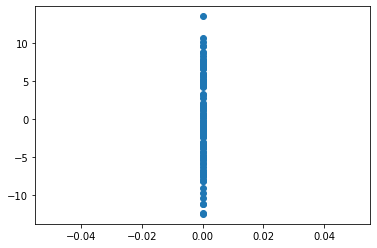

In [33]:
plt.scatter(M[:,0],M[:,1])

In [34]:
new_data1 = np.dot(vectores, M.T)

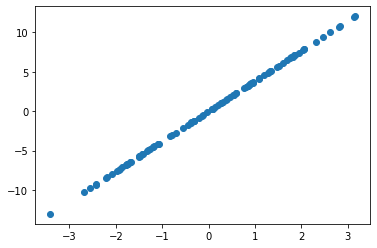

In [35]:
plt.scatter(new_data1[0,:],new_data1[1,:])

In [36]:
pca = PCA(n_components = 1)
pca.fit(data)

PCA(n_components=1)

In [37]:
print(pca.explained_variance_)

[36.86420121]


In [38]:
print(pca.components_)

[[-0.25271035 -0.96754198]]


In [41]:
data1 = pca.transform(data)

In [43]:
new_data1 = pca.inverse_transform(data1)

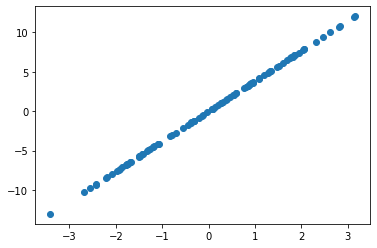

In [46]:
plt.scatter(new_data1[:,0],new_data1[:,1])